In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import scipy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import tcav
from src.plots import plot_tsne, plot_pca, filter_data_labels
from src.concept_vectors import *
from src.util import *
import seaborn as sns
from src.dataset import get_cub_attributes 

2022-12-10 15:21:18.121646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
all_cub_attributes = get_cub_attributes()
analyzed_attributes = ['has_bill_shape::dagger', 
                       'has_bill_shape::hooked_seabird', 
                       'has_bill_shape::all-purpose', 
                       'has_bill_shape::cone', 
                       'has_leg_color::grey', 
                       'has_leg_color::black', 
                       'has_leg_color::buff', 
                       'has_bill_color::grey', 
                       'has_bill_color::black', 
                       'has_bill_color::buff']

## Retrieve TCAV Concept Vectors

In [5]:
concept_vectors_tcav = []
concept_metadata_tcav = []

In [6]:
bottlenecks = ["mixed4c"]
experiments_per_concept = 20

In [7]:
for attribute in analyzed_attributes:
    tcav_vectors, tcav_metadata = load_tcav_vectors(attribute,bottlenecks)
    assert len(tcav_metadata) == experiments_per_concept
    concept_vectors_tcav+=list(tcav_vectors)
    concept_metadata_tcav+=tcav_metadata
concept_vectors_tcav = np.array(concept_vectors_tcav)

In [8]:
label_by_concept_tcav = [i['concept'] for i in concept_metadata_tcav]

## Retrieve CBM Concept Vectors (from labels)

In [9]:
concept_vectors_cbm = []
concept_metadata_cbm = []

In [10]:
for attribute in analyzed_attributes: 
    cbm_vector = create_vector_from_label_cub(attribute)
    concept_vectors_cbm += list(cbm_vector)
    concept_metadata_cbm+=[{'concept': attribute}]
concept_vectors_cbm = np.array(concept_vectors_cbm)

In [11]:
concept_vectors_cbm.shape

(10, 4796)

In [12]:
label_by_concept_cbm = [i['concept'] for i in concept_metadata_cbm]

## Retrieve CEM Concept Vectors

In [13]:
concept_vectors_cem = []
concept_metadata_cem = []

In [14]:
for attribute in analyzed_attributes: 
    cem_vectors = list(load_cem_vectors("cub",all_cub_attributes.index(attribute)))
    concept_vectors_cem+=cem_vectors
    concept_metadata_cem+=[{'concept': attribute} for j in range(len(cem_vectors))]
concept_vectors_cem = np.array(concept_vectors_cem)

In [15]:
label_by_concept_cem = [i['concept'] for i in concept_metadata_cem]

## Plot all Data

### Dimensionality Reduced Plots 

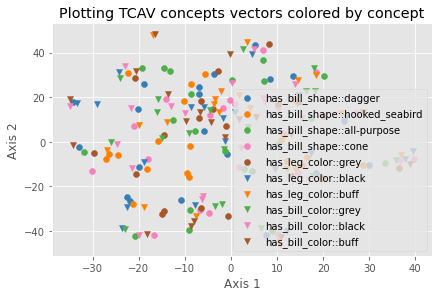

In [16]:
plt.title("Plotting TCAV concepts vectors colored by concept")
plt.tight_layout()
plot_tsne(concept_vectors_tcav,label_by_concept_tcav)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")
plt.savefig("scripts/Figures/tcav_birds_tsne.png", bbox_inches="tight")

Text(27.0, 0.5, 'Axis 2')

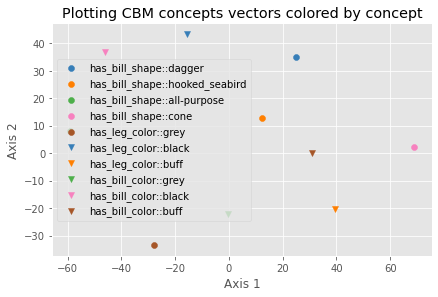

In [17]:
plt.title("Plotting CBM concepts vectors colored by concept")
plt.tight_layout()
plot_tsne(concept_vectors_cbm,label_by_concept_cbm)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")

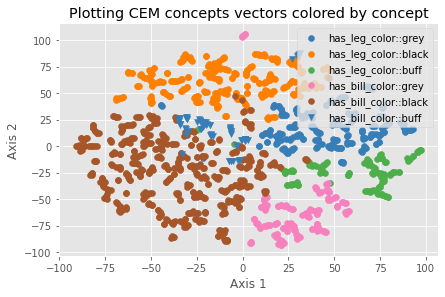

In [18]:
plt.title("Plotting CEM concepts vectors colored by concept")
plt.tight_layout()
plot_tsne(concept_vectors_cem,label_by_concept_cem)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")
plt.savefig("scripts/Figures/cem_birds_tsne.png", bbox_inches="tight")

### Heatmaps

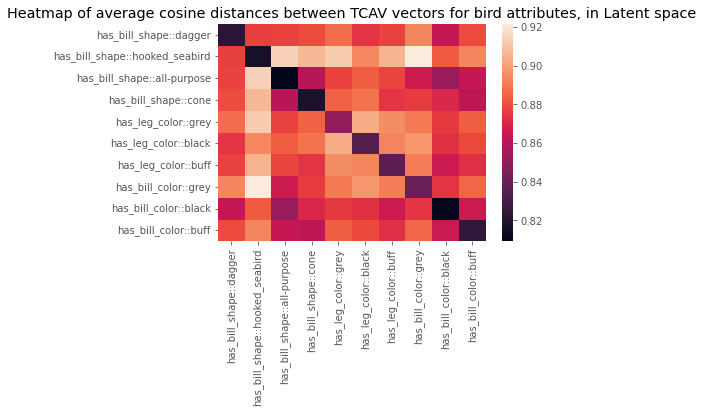

In [19]:
cosine_by_class_raw = find_average_distances(concept_vectors_tcav,encode_list(label_by_concept_tcav),cosine_metric=True)
sns.heatmap(cosine_by_class_raw,xticklabels=find_unique_in_order(label_by_concept_tcav),
            yticklabels=find_unique_in_order(label_by_concept_tcav))
plt.title("Heatmap of average cosine distances between TCAV vectors for bird attributes, in Latent space")
plt.savefig("scripts/Figures/heatmap_birds_tcav.png", bbox_inches="tight")

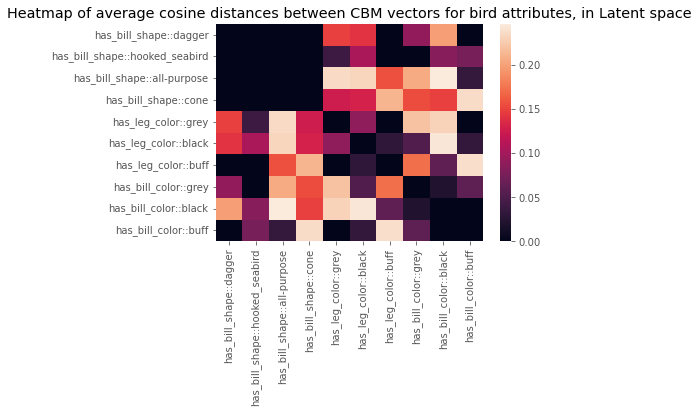

In [23]:
cosine_by_class_raw = find_average_distances(concept_vectors_cbm,encode_list(label_by_concept_cbm),cosine_metric=True)
sns.heatmap(cosine_by_class_raw,xticklabels=find_unique_in_order(label_by_concept_cbm),
            yticklabels=find_unique_in_order(label_by_concept_cbm))
plt.title("Heatmap of average cosine distances between CBM vectors for bird attributes, in Latent space")
plt.savefig("scripts/Figures/heatmap_birds_cbm.png", bbox_inches="tight")

In [21]:
cosine_by_class_raw = find_average_distances(concept_vectors_cem,encode_list(label_by_concept_cem),cosine_metric=True)
sns.heatmap(cosine_by_class_raw,xticklabels=find_unique_in_order(label_by_concept_cem),
            yticklabels=find_unique_in_order(label_by_concept_cem))
plt.title("Heatmap of average cosine distances between CEM vectors for bird attributes, in Latent space")
plt.savefig("scripts/Figures/heatmap_birds_cem.png", bbox_inches="tight")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



### Plotting the Entropy

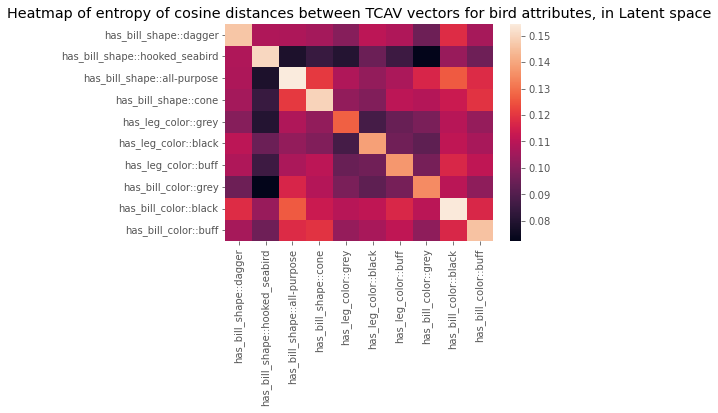

In [27]:
cosine_by_class_raw = find_average_distances(concept_vectors_tcav,encode_list(label_by_concept_tcav),cosine_metric=True)
sns.heatmap(cosine_by_class_raw*(1-cosine_by_class_raw),xticklabels=find_unique_in_order(label_by_concept_tcav),
            yticklabels=find_unique_in_order(label_by_concept_tcav))
plt.title("Heatmap of entropy of cosine distances between TCAV vectors for bird attributes, in Latent space")
plt.savefig("scripts/Figures/heatmap_birds_tcav.png", bbox_inches="tight")

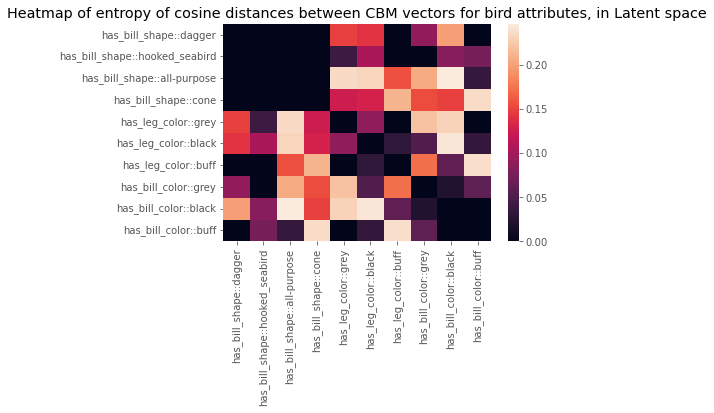

In [25]:
cosine_by_class_raw = find_average_distances(concept_vectors_cbm,encode_list(label_by_concept_cbm),cosine_metric=True)
sns.heatmap(cosine_by_class_raw*(1-cosine_by_class_raw),xticklabels=find_unique_in_order(label_by_concept_cbm),
            yticklabels=find_unique_in_order(label_by_concept_cbm))
plt.title("Heatmap of entropy of cosine distances between CBM vectors for bird attributes, in Latent space")
plt.savefig("scripts/Figures/heatmap_birds_cbm.png", bbox_inches="tight")